# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

#### My hypotheses
Applicants not likely to get a loan
1. Applicants with more dependents.
2. Self-employed or employed in contractual roles.
3. Big loan amounts over large terms.
4. No credit history.
5. Few/no assets, properties.
6. New in the country (new immigrants).


## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [11]:
import seaborn as sns

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df.shape

(614, 13)

In [3]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [8]:
df[df.Credit_History==1].shape[0] #How many applicants have a Credit_History? 

475

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

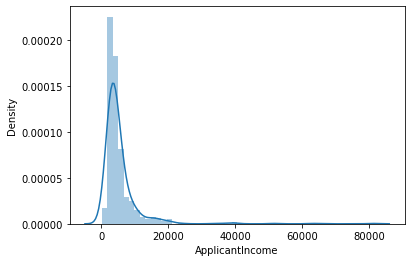

In [12]:
sns.distplot(df.ApplicantIncome)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

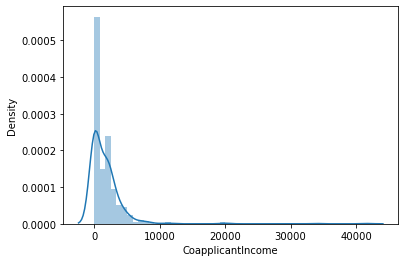

In [13]:
sns.distplot(df.CoapplicantIncome)

Most of the applicants have low salaries. The distribution is left-skewed which makes sense.

In [14]:
df.ApplicantIncome.mean(), df.ApplicantIncome.median()

(5403.459283387622, 3812.5)

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [19]:
catFeats=df.dtypes[df.dtypes == 'object'].index.tolist()

In [20]:
catFeats

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [22]:
df['Loan_ID'].nunique() #unique for each applicant

614

In [23]:
df['Gender'].nunique()

2

In [25]:
df['Married'].value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

In [26]:
df['Dependents'].value_counts(dropna=False)

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

In [27]:
df['Education'].value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [28]:
df['Self_Employed'].value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

In [29]:
df['Property_Area'].value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [30]:
df['Loan_Status'].value_counts(dropna=False) #~69% loans are approved, sample in a way to have equal values of both Y and N.

Y    422
N    192
Name: Loan_Status, dtype: int64

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



(array([607.,   5.,   2.]),
 array([  150., 27100., 54050., 81000.]),
 <BarContainer object of 3 artists>)

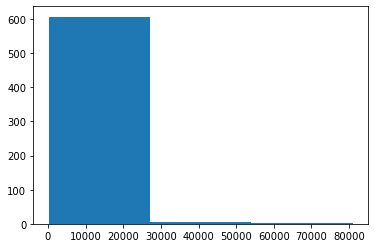

In [31]:
plt.hist(df.ApplicantIncome,bins=3)

(array([592.,  15.,   4.,   2.,   1.]),
 array([  150., 16320., 32490., 48660., 64830., 81000.]),
 <BarContainer object of 5 artists>)

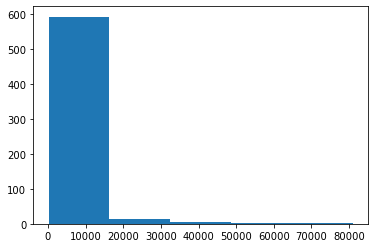

In [36]:
plt.hist(df.ApplicantIncome,bins=5)


Look at box plots to understand the distributions. 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

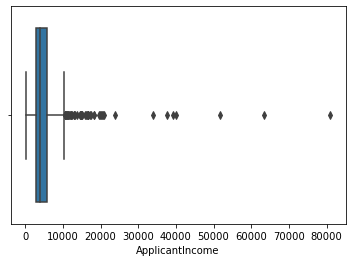

In [37]:
sns.boxplot(df.ApplicantIncome)

(array([ 89., 475.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

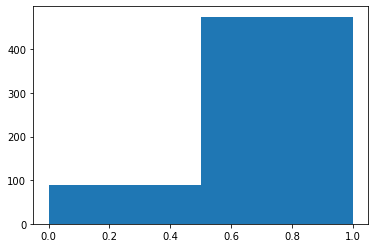

In [117]:
plt.hist(df.Credit_History, bins =2)

In [118]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

(array([ 72., 310., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <BarContainer object of 10 artists>)

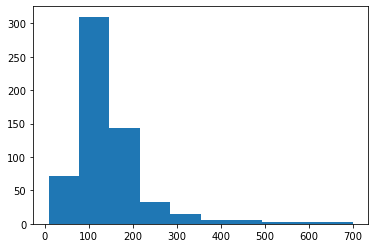

In [40]:
plt.hist(df.LoanAmount)

(array([  9.,   3.,  48.,  13., 512.,  15.]),
 array([ 12.,  90., 168., 246., 324., 402., 480.]),
 <BarContainer object of 6 artists>)

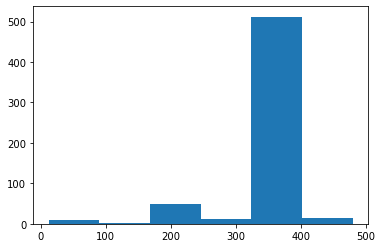

In [115]:
plt.hist(df.Loan_Amount_Term, bins=6)

Text(0, 0.5, 'Loan Term')

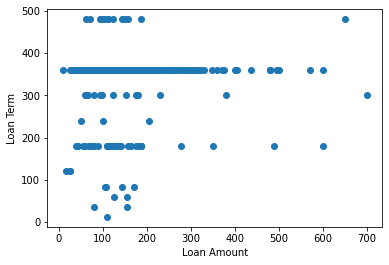

In [43]:
plt.scatter(df.LoanAmount,df.Loan_Amount_Term)
plt.xlabel('Loan Amount')
plt.ylabel('Loan Term')

Look at the distribution of income segregated  by `Education`

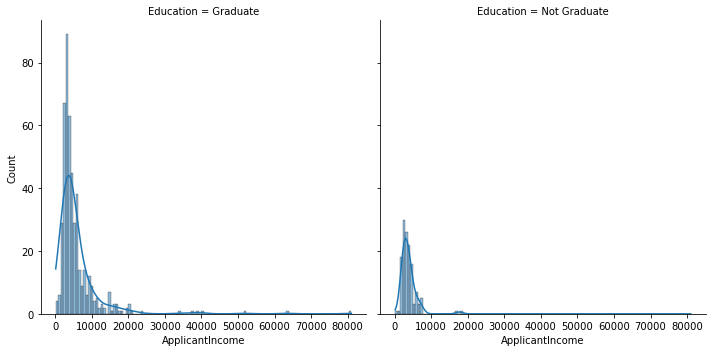

In [45]:
sns.displot(data=df, x="ApplicantIncome", col="Education", kde=True)

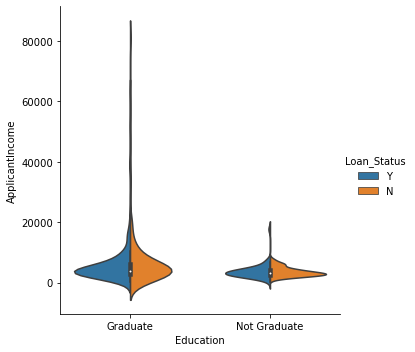

In [46]:
sns.catplot(data=df, kind="violin", x="Education", y="ApplicantIncome", hue="Loan_Status", split=True)

Look at the histogram and boxplot of LoanAmount

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

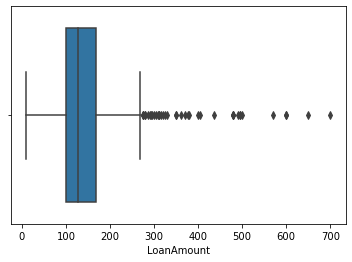

In [47]:
sns.boxplot(df.LoanAmount)

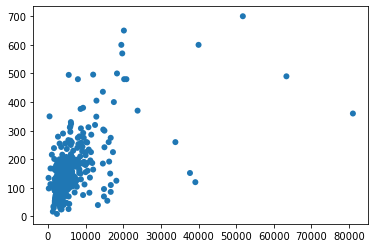

In [51]:
plt.scatter(df.ApplicantIncome,df.LoanAmount, edgecolors='none')

In [52]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

ApplicantIncome is +80000 for some applicant who might be taking a loan in case of emergency like medical, travel, etc.
Missing loan amount should be imputed with median.


Dependents feature can be binarized.
Loan Amount term can be converted in years, and then bins like soon, late, etc.
ApplicantIncome and LoanAMount can be raised to polynomial degree.
Income/Loan Amount can be binned adaptively

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [55]:
pd.pivot_table(df,columns=['Loan_Status'],index=['Gender','Education'],values=['LoanAmount'] )

LoanAmount            
Loan_Status                   N           Y
Gender Education                           
Female Graduate      133.451613  127.966102
       Not Graduate   99.200000  116.214286
Male   Graduate      171.373737  152.977273
       Not Graduate  125.292683  116.151515

In [67]:
df_heat1=pd.pivot_table(df,columns=['Loan_Status'],index=['Gender'],values=['LoanAmount'] )

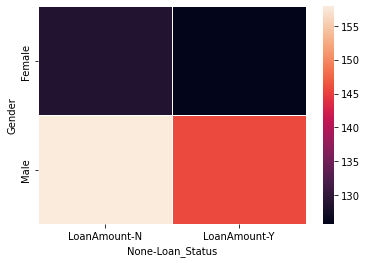

In [68]:
s=sns.heatmap(df_heat1,annot=False,linewidths=0.5)
plt.show()

Females applying for loans of lesser values.

In [57]:
pd.pivot_table(df,columns=['Loan_Status'],index=['Married','Property_Area'],values=['ApplicantIncome'] )

ApplicantIncome             
Loan_Status                         N            Y
Married Property_Area                             
No      Rural             5970.720000  4297.236842
        Semiurban         4984.791667  5390.178571
        Urban             4294.066667  4895.550000
Yes     Rural             6796.840909  5313.291667
        Semiurban         5546.500000  5210.016529
        Urban             4678.615385  6299.130435

In [71]:
df_heat2=pd.pivot_table(df,index=['Property_Area'],values=['ApplicantIncome'] )

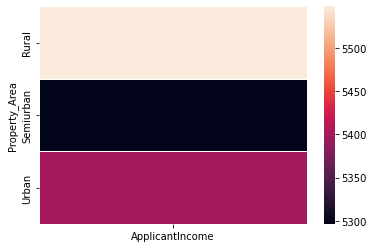

In [72]:
s=sns.heatmap(df_heat2,annot=False,linewidths=0.5,robust=True)
plt.show()

In [111]:
df[['Self_Employed','Gender','LoanAmount']].groupby(['Self_Employed','Gender'],).melt()


LoanAmount
Self_Employed Gender            
No            Female          87
              Male           395
Yes           Female          14
              Male            65

<AxesSubplot:xlabel='Self_Employed'>

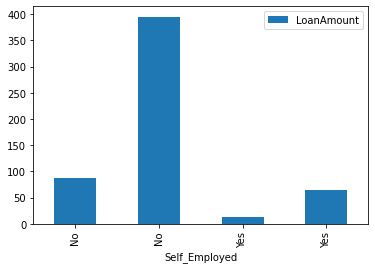

In [110]:
df_plot.plot(x='Self_Employed',kind='bar',stacked=True)

Surprising; mean income of applicants from rural areas are more.

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [94]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [96]:
df['Gender']=df['Gender'].fillna('Male')

In [97]:
df['Married']=df['Married'].fillna('No') #assuming applicants not married left it empty

In [98]:
df['Dependents']=df['Dependents'].fillna('0') #same assumption as above

In [112]:
df['Self_Employed']=df['Self_Employed'].fillna('No') #assuming shouldn't be empty for someone who is selfemployed

In [113]:
df['LoanAmount']=df[['Gender','LoanAmount']].groupby('Gender').transform(lambda x: x.fillna(x.median()))

In [116]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean()) #due to right-skewness

In [119]:
df['Credit_History']=df['Credit_History'].fillna(0.0)

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

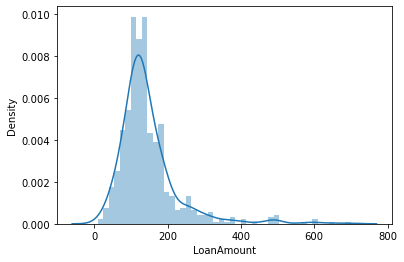

In [120]:
sns.distplot(df['LoanAmount'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='LoanAmount_log', ylabel='Density'>

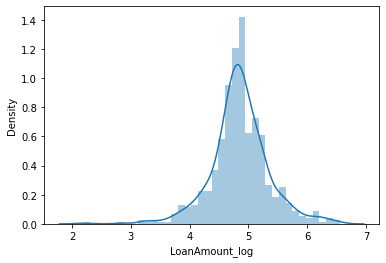

In [121]:
df['LoanAmount_log'] = df['LoanAmount'].apply(np.log)
sns.distplot(df['LoanAmount_log'])

Combine both incomes as total income and take a log transformation of the same.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='TotalIncome', ylabel='Density'>

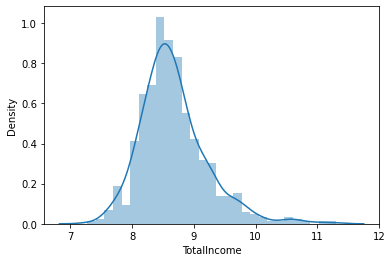

In [122]:
df['TotalIncome']=(df['ApplicantIncome']+df['CoapplicantIncome']).apply(np.log)
sns.distplot(df['TotalIncome'])

## 4. Building a Predictive Model

Try paramater grid search to improve the results

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python